In [1]:
include("./PeriodicKdV.jl")
using .PeriodicKdV
using LinearAlgebra, Plots, SparseArrays, Printf

# BA function computation and testing

In [22]:
left_edge = 0.001
max_left_edge = 100.0
dx = 3.0
left = left_edge:dx:max_left_edge |> Array
gapfun = x ->  x < 8.0 ? 0.5 : 1.0./(1.5 .+ x.^5)
len = dx*map(gapfun,left)
right = left + len
gaps = hcat(left,right)
σ = .5 .+ rand(size(gaps)[1])/10
zs = σ.*gaps[:,1] + (1.0 .- σ).*gaps[:,2]
o = fill(-1.0,size(gaps)[1])
zs = hcat(zs,o)

gaps |> display
zs |> display

34×2 Array{Float64,2}:
  0.001   1.501
  3.001   4.501
  6.001   7.501
  9.001   9.00105
 12.001  12.001
 15.001  15.001
 18.001  18.001
 21.001  21.001
 24.001  24.001
 27.001  27.001
 30.001  30.001
 33.001  33.001
 36.001  36.001
  ⋮      
 66.001  66.001
 69.001  69.001
 72.001  72.001
 75.001  75.001
 78.001  78.001
 81.001  81.001
 84.001  84.001
 87.001  87.001
 90.001  90.001
 93.001  93.001
 96.001  96.001
 99.001  99.001

34×2 Array{Float64,2}:
  0.611129  -1.0
  3.66615   -1.0
  6.69595   -1.0
  9.00102   -1.0
 12.001     -1.0
 15.001     -1.0
 18.001     -1.0
 21.001     -1.0
 24.001     -1.0
 27.001     -1.0
 30.001     -1.0
 33.001     -1.0
 36.001     -1.0
  ⋮         
 66.001     -1.0
 69.001     -1.0
 72.001     -1.0
 75.001     -1.0
 78.001     -1.0
 81.001     -1.0
 84.001     -1.0
 87.001     -1.0
 90.001     -1.0
 93.001     -1.0
 96.001     -1.0
 99.001     -1.0

In [23]:
S = HyperellipticSurface(gaps,zs,200);

In [29]:
BA = BakerAkhiezerFunction(S,10,1e-5);

Effective rank of Cauchy operator = 1532
Maximum rank of Cauchy operator = 46240


In [27]:
34*2*2*100

13600

In [31]:
@time out = BA(0.0,0.0,1e-10);

  0.242744 seconds (318.23 k allocations: 63.971 MiB)


In [ ]:
x = -5:.01:5
y = map(x -> KdV(BA,x,0.), x);

In [ ]:
plot(x, y |> real)

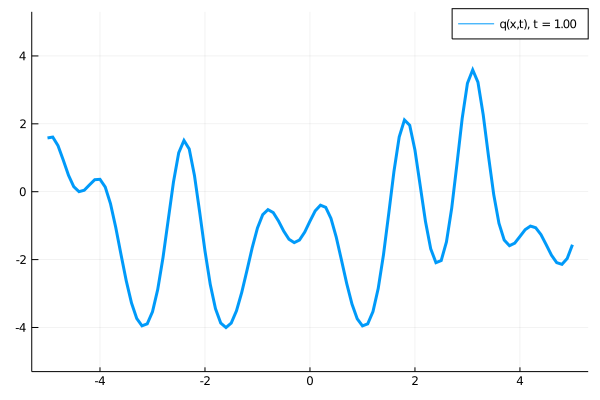

┌ Info: Saved animation to 
│   fn = /Users/thomastrogdon/Dropbox (uwamath)/Projects/Collaborations/Periodic KdV/PeriodicKdV/test.gif
└ @ Plots /Users/thomastrogdon/.julia/packages/Plots/jpF9l/src/animation.jl:104


Plots.AnimatedGif("/Users/thomastrogdon/Dropbox (uwamath)/Projects/Collaborations/Periodic KdV/PeriodicKdV/test.gif")
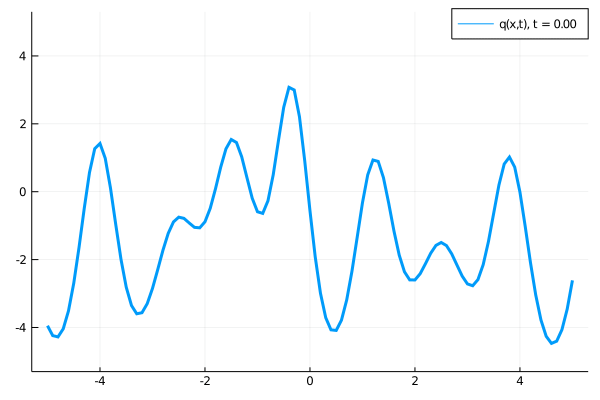

In [32]:
T = 1
k = 0.01
n = convert(Int64,ceil(T/k))
plot()
anim = Animation()
t = 0.0
x = -5:0.1:5 |> Array
q = map(x -> KdV(BA,x,t) |> real, x);
p = plot(x, q, xaxis = [minimum(x),maximum(x)], yaxis = [-5,5],lw=3,label = @sprintf("q(x,t), t = %1.2f",t))
frame(anim)
p |> IJulia.display
for i = 2:n+1
    t += k
    IJulia.clear_output(true)
    q = map(x -> KdV(BA,x,t) |> real, x);
    p = plot(x, q, xaxis = [minimum(x),maximum(x)], yaxis = [-5,5],lw=3,label = @sprintf("q(x,t), t = %1.2f",t))
    frame(anim)
    p |> IJulia.display
end
gif(anim,"test.gif")

# Genus one

In [ ]:
left_edge = 0.001
max_left_edge = 3.0
dx = 3.0
left = left_edge:dx:max_left_edge |> Array
gapfun = x -> 1.5./(1 .+ x.^2)
len = dx*gapfun(left) |> reverse
right = left + len
gaps = hcat(left,right)
σ = .5 .+ rand(size(gaps)[1])/10
zs = σ.*gaps[:,1] + (1.0 .- σ).*gaps[:,2]
o = fill(1.0,size(gaps)[1])
zs = hcat(zs,o)

gaps |> display
zs |> display

In [ ]:
S = HyperellipticSurface(gaps,zs);

In [ ]:
BA = BakerAkhiezerFunction(S,20,1e-13);

In [ ]:
@time out = BA(0.0,0.0);

In [ ]:
map(x -> out[1](x,1), sqrt.(zs[:,1]))

In [ ]:
x = -10:.01:10
y = map(x -> KdV(BA,x,0.), x);

In [ ]:
plot(x,real(y))

In [ ]:
T = 10
k = 0.01
n = convert(Int64,ceil(T/k))
plot()
anim = Animation()
t = 0.0
x = -5:0.1:5 |> Array
q = map(x -> KdV(BA,x,t) |> real, x);
p = plot(x, q, xaxis = [minimum(x),maximum(x)], yaxis = [-5,5],lw=3,label = @sprintf("q(x,t), t = %1.2f",t))
frame(anim)
p |> IJulia.display
for i = 2:n+1
    t += k
    IJulia.clear_output(true)
    q = map(x -> KdV(BA,x,t) |> real, x);
    p = plot(x, q, xaxis = [minimum(x),maximum(x)], yaxis = [-5,5],lw=3,label = @sprintf("q(x,t), t = %1.2f",t))
    frame(anim)
    p |> IJulia.display
end
gif(anim,"genus_one.gif")

# Genus two

In [ ]:
left_edge = 0.001
max_left_edge = 6.0
dx = 3.0
left = left_edge:dx:max_left_edge |> Array
gapfun = x -> 0.9./(1 .+ x.^2)
len = dx*gapfun(left)
right = left + len
gaps = hcat(left,right)
σ = .5 .+ rand(size(gaps)[1])/10
zs = σ.*gaps[:,1] + (1.0 .- σ).*gaps[:,2]
o = fill(1.0,size(gaps)[1])
zs = hcat(zs,o)

gaps |> display
zs |> display

In [ ]:
S = HyperellipticSurface(gaps,zs);

In [ ]:
BA = BakerAkhiezerFunction(S,20,1e-8);

In [ ]:
@time out = BA(0.0,0.0);

In [ ]:
map(x -> out[1](x,1), sqrt.(zs[:,1]))

In [ ]:
x = -10:.03:10
y = map(x -> KdV(BA,x,0.), x);

In [ ]:
plot(x,real(y))

In [ ]:
T = 5
k = 0.01
n = convert(Int64,ceil(T/k))
plot()
anim = Animation()
t = 0.0
x = -5:0.05:5 |> Array
q = map(x -> KdV(BA,x,t) |> real, x);
p = plot(x, q, xaxis = [minimum(x),maximum(x)], yaxis = [-5,5],lw=3,label = @sprintf("q(x,t), t = %1.2f",t))
frame(anim)
p |> IJulia.display
for i = 2:n+1
    t += k
    IJulia.clear_output(true)
    q = map(x -> KdV(BA,x,t) |> real, x);
    p = plot(x, q, xaxis = [minimum(x),maximum(x)], yaxis = [-5,5],lw=3,label = @sprintf("q(x,t), t = %1.2f",t))
    frame(anim)
    p |> IJulia.display
end
gif(anim,"genus_two.gif")

# Genus thirty

In [ ]:
left_edge = 0.1
max_left_edge = 30
dx = 1.0
left = left_edge:dx:max_left_edge |> Array
gapfun = x -> dx./(1 .+ x.^2)
len = dx*gapfun(left)
right = left + len
gaps = hcat(left,right)
σ = .5 .+ rand(size(gaps)[1])/10
zs = σ.*gaps[:,1] + (1.0 .- σ).*gaps[:,2]
o = fill(1.0,size(gaps)[1])
zs = hcat(zs,o)

gaps |> display
zs |> display

In [ ]:
S = HyperellipticSurface(gaps,zs);

In [ ]:
BA = BakerAkhiezerFunction(S,20,1e-8);

In [ ]:
@time out = BA(0.0,0.0);

In [ ]:
x = -5:.1:5
y = map(x -> KdV(BA,x,0.), x);

In [ ]:
plot(x,real(y))

In [ ]:
T = 5
k = 0.01
n = convert(Int64,ceil(T/k))
plot()
anim = Animation()
t = 0.0
x = -5:0.05:5 |> Array
q = map(x -> KdV(BA,x,t) |> real, x);
p = plot(x, q, xaxis = [minimum(x),maximum(x)], yaxis = [-2,2],lw=3,label = @sprintf("q(x,t), t = %1.2f",t))
frame(anim)
p |> IJulia.display
for i = 2:n+1
    t += k
    IJulia.clear_output(true)
    q = map(x -> KdV(BA,x,t) |> real, x);
    p = plot(x, q, xaxis = [minimum(x),maximum(x)], yaxis = [-2,2],lw=3,label = @sprintf("q(x,t), t = %1.2f",t))
    frame(anim)
    p |> IJulia.display
end
gif(anim,"genus_thirty.gif")

In [ ]:
gif(anim,"genus_thirty.gif")